In [77]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


In [13]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

## Clustering Using KMeans

In [14]:
# Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# Output the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[0.00000000e+00 1.08919519e-04 0.00000000e+00 ... 3.24095412e-04
  0.00000000e+00 8.49573851e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.70901944e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66122236e-04 ... 0.00000000e+00
  0.00000000e+00 1.77053803e-04]
 [1.11353011e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [16]:

# Cluster Evaluation
silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X.toarray(), kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.004904061770774556
Davies-Bouldin Index: 9.147498591730416


In [17]:
# Keyword Analysis
feature_names = vectorizer.get_feature_names_out()
cluster_centers = kmeans.cluster_centers_

num_top_keywords = 5
for i, cluster_center in enumerate(cluster_centers):
    top_keywords_idx = cluster_center.argsort()[-num_top_keywords:][::-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(f"Cluster {i+1} Top Keywords: {top_keywords}")

Cluster 1 Top Keywords: ['food', 'driver', 'customer', 'service', 'refund']
Cluster 2 Top Keywords: ['item', 'missing', 'refund', 'service', 'get']
Cluster 3 Top Keywords: ['value', 'quality', 'le', 'shipping', 'show']
Cluster 4 Top Keywords: ['great', 'food', 'hot', 'fast', 'good']
Cluster 5 Top Keywords: ['app', 'delivery', 'time', 'food', 'get']
Cluster 6 Top Keywords: ['easy', 'use', 'great', 'app', 'fast']


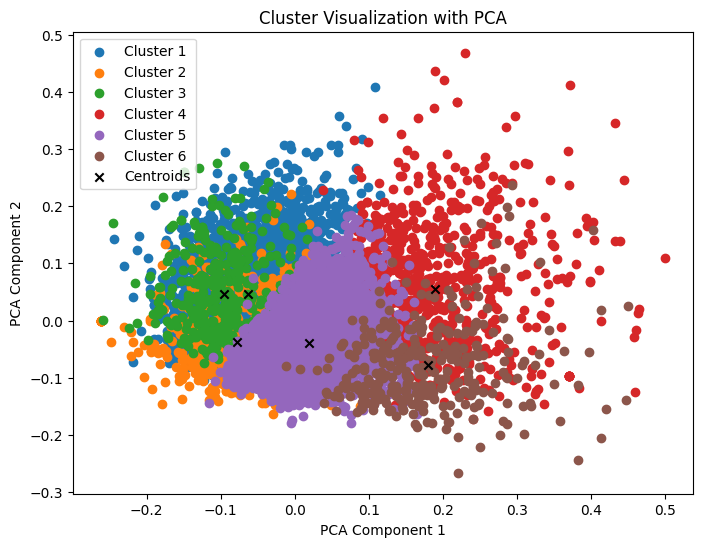

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cluster Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for i in range(len(df['cluster'].unique())):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i+1}')

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', color='black', label='Centroids')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Using KNN


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
# Keywords dictionary
keywords_dict = {
    'food quality': ['taste', 'freshness', 'temperature', 'quality'],
    'delivery experience': ['on-time', 'professional', 'courteous', 'careful'],
    'price': ['value', 'reasonable', 'affordable', 'expensive'],
    'customer service': ['helpful', 'responsive', 'knowledgeable', 'friendly'],
    'app functionality': ['easy to use', 'intuitive', 'reliable', 'glitchy']
}

In [42]:
# Initialize and fit K-means clustering model
num_clusters = len(keywords_dict)  # Number of clusters based on the number of keyword categories
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [76]:
# Get cluster assignments and silhouette score
df['cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X.toarray(), kmeans.labels_)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.004066134283171353
Davies-Bouldin Index: 10.072790915728147


In [74]:

# Analyze the clusters
cluster_results = df.groupby('cluster')['stars'].mean().reset_index()
print("Cluster Analysis:")
print(cluster_results)

# Determine the best and worst performing categories based on the number of stars
best_category = cluster_results.loc[cluster_results['stars'].idxmax(), 'cluster']
worst_category = cluster_results.loc[cluster_results['stars'].idxmin(), 'cluster']

print(f"\nBest Performing Category: {best_category+1}")
print(f"Worst Performing Category: {worst_category+1}")

Silhouette Score: 0.004066134283171353
Davies-Bouldin Index: 10.072790915728147
Cluster Analysis:
   cluster     stars
0        0  2.456882
1        1  1.518325
2        2  1.273927
3        3  4.801653
4        4  1.160714

Best Performing Category: 4
Worst Performing Category: 5


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Perform keyword analysis
num_top_keywords = 10
for i, cluster_center in enumerate(kmeans.cluster_centers_):
    # Get the indices of the top keywords for the current cluster
    top_keywords_idx = cluster_center.argsort()[-num_top_keywords:][::-1]
    # Get the actual top keywords using the indices
    top_keywords = [vectorizer.get_feature_names_out()[idx] for idx in top_keywords_idx]
    print(f"Cluster {i+1} Top Keywords: {top_keywords}")


Cluster 1 Top Keywords: ['app', 'delivery', 'time', 'fee', 'get', 'restaurant', 'use', 'food', 'service', 'one']
Cluster 2 Top Keywords: ['food', 'driver', 'delivery', 'time', 'cold', 'delivered', 'never', 'hour', 'refund', 'get']
Cluster 3 Top Keywords: ['customer', 'service', 'refund', 'item', 'missing', 'money', 'get', 'support', 'never', 'app']
Cluster 4 Top Keywords: ['great', 'easy', 'fast', 'food', 'delivery', 'hot', 'good', 'service', 'time', 'quick']
Cluster 5 Top Keywords: ['value', 'quality', 'le', 'shipping', 'show', 'return', 'service', 'product', 'food', 'used']


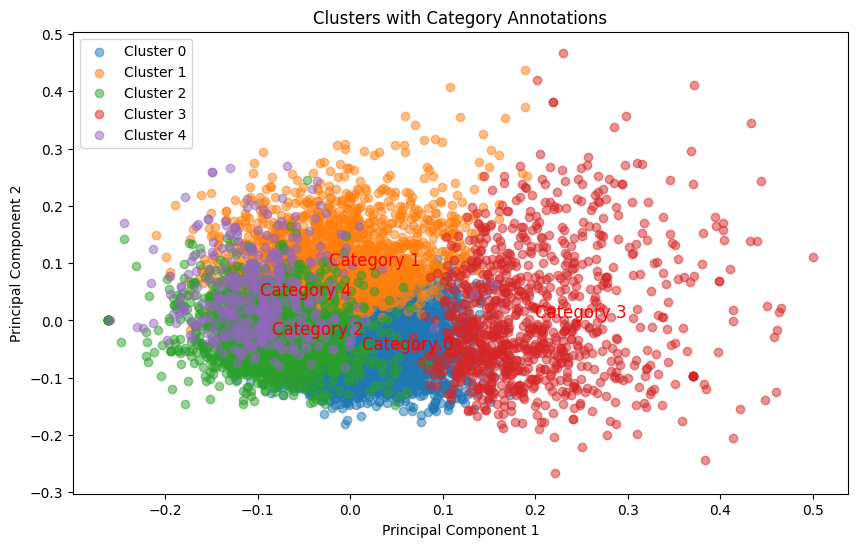

In [58]:
# Fit PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i}', alpha=0.5)

# Annotate cluster centers with category
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(cluster_centers_pca):
    plt.text(x, y, f'Category {i}', fontsize=12, color='red')

plt.title('Clusters with Category Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()